## 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.


#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해 봅시다.
1. 데이터를 톺아봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding  
    
    
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!  
    
    
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않습니다. 우리가 다룬 여러 Technique를 써줘야 합니다.
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두 개 이상의 DataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## 0. 라이브러리 준비

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Spotify Dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_by_genres_o.csv)

In [2]:
## 데이터 불러오기
## Spotify 
spotify_df = pd.read_csv("./data/tracks.csv")

## 1. 분석의 목적과 변수 확인

In [3]:
## 각 Column의 데이터 타입 확인하기
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
## 각 Column의 데이터 타입 및 결측치 확인하기
spotify_df.info()    ## name에 결측치 존재!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
spotify_df[spotify_df['name'].isna()]  ## name column외에도 artists, id_artists에도 결측치 존재 확인

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [6]:
## Organize dataset : Modify [''] to nan in artists and format of release_date
df = spotify_df.copy()
df.artists = df.artists.replace("['']", np.nan)
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

## 2. 데이터 전체적으로 살펴보기

In [7]:
## 데이터 전체 정보
spotify_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [8]:
## 상관계수 확인!
spotify_df.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
duration_ms,0.027681,1.000000,-0.016747,-0.120371,0.024825,0.004626,0.000337,-0.027610,-0.125771,-0.064434,0.069278,0.002137,-0.163202,-0.001210,0.037552
explicit,0.211758,-0.016747,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447
danceability,0.187000,-0.120371,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
key,0.015299,0.004626,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
mode,-0.033655,-0.027610,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892
speechiness,-0.047357,-0.125771,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.064434,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927


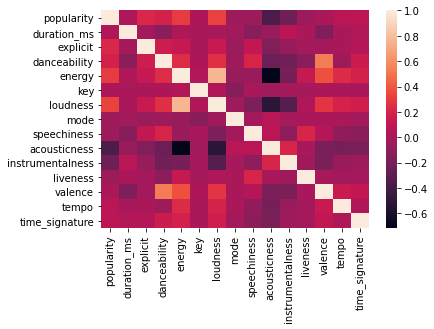

In [9]:
sns.heatmap(spotify_df.corr())
plt.show()

energy와 loudness는 비례, acousticness와 (energy, loudness)는 반비례!

## 3. 데이터 개별 속성 파악하기

### 1) Popularity

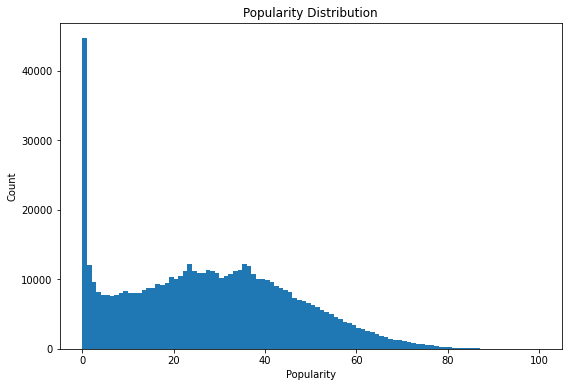

In [10]:
plt.figure(figsize=[9,6])
plt.hist(data=df, x = 'popularity', bins=np.arange(0, df['popularity'].max()+1, 1))
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

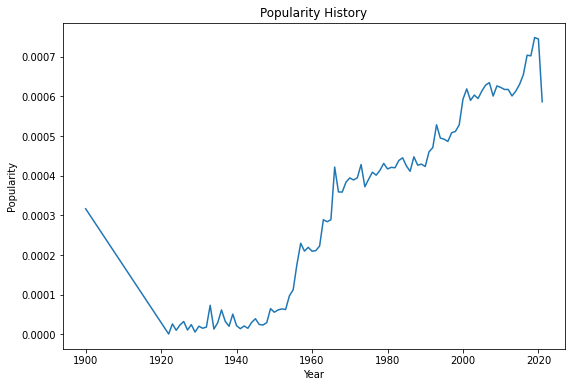

In [11]:
year_df = df.groupby('year').mean()
year_index = list(year_df.index)

plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['popularity']]/60000)
plt.title('Popularity History')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

### 2) Duration

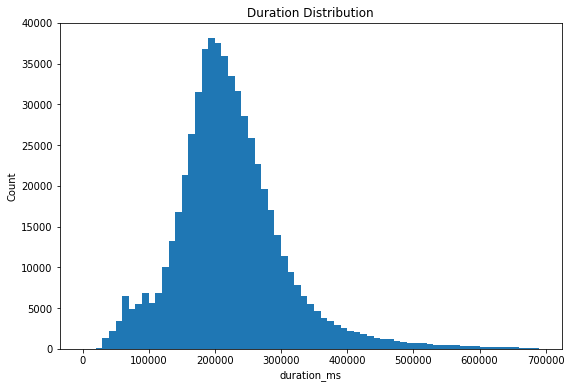

In [12]:
bins = np.arange(0, 700000, 10000)

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'duration_ms', bins = bins)
plt.title('Duration Distribution')
plt.xlabel('duration_ms')
plt.ylabel('Count')
plt.show()

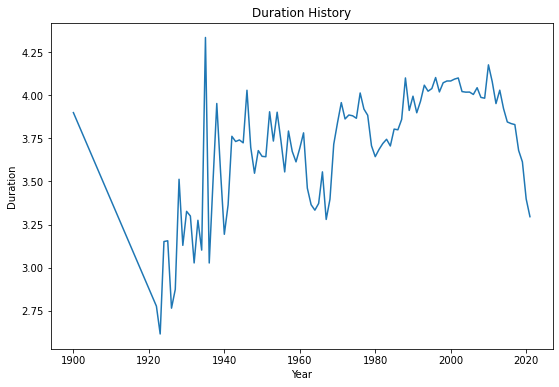

In [13]:
year_df = df.groupby('year').mean()
year_index = list(year_df.index)

plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['duration_ms']]/60000)
plt.title('Duration History')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

### 3) Release date

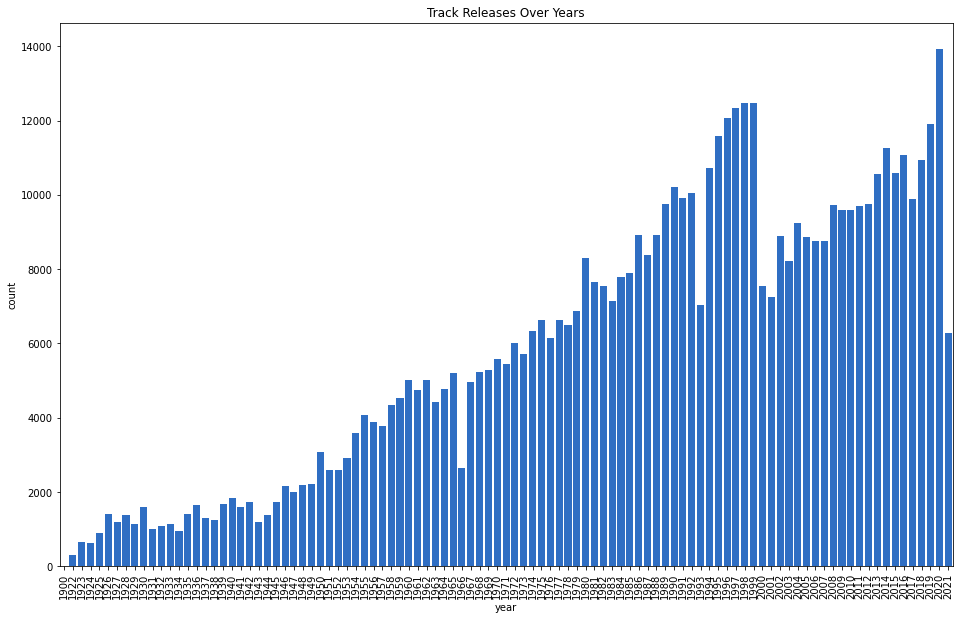

In [14]:
df['year'] = df['release_date'].dt.year
base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 10])
plt.xticks(rotation=90)
plt.title('Track Releases Over Years')
sns.countplot(data=df, x='year', color='#166ADC')
plt.show()

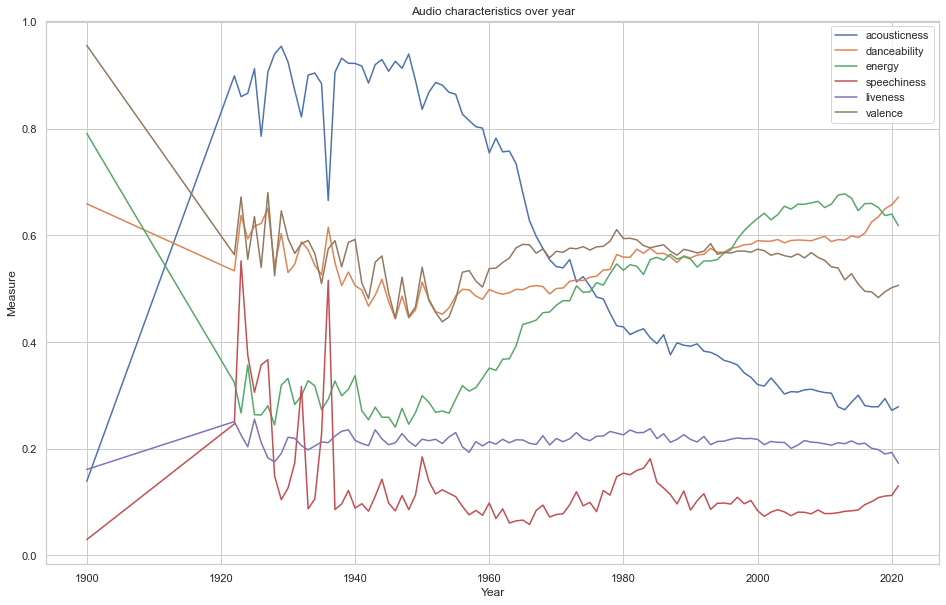

In [15]:
# Audio characteristics over year
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Audio characteristics over year');
ax.set_ylabel('Measure');
ax.set_xlabel('Year');

### 4) Explicit
대부분의 데이터가 non-explicit임을 알 수 있다.

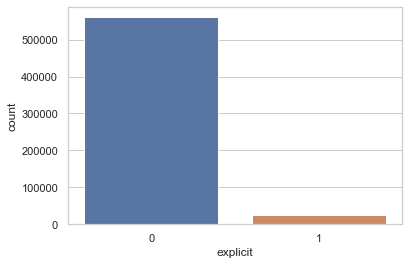

In [16]:
sns.countplot(x='explicit', data=df)
plt.show()

### 5) Key

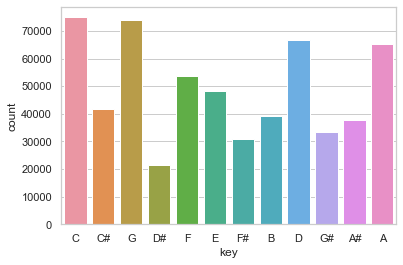

In [17]:
# Key Count of Songs
df_keys = df.copy()
keys = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
for idx, k in enumerate(keys) : #{
    df_keys['key'] = df_keys['key'].replace([idx], k)
#}
            
sns.countplot(x='key', data=df_keys)
plt.show()

In [18]:
df_keys.groupby('key').mean()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
key,,,,,,,,,,,,,,,
A,28.070968,231118.681857,0.034778,0.559186,0.565494,-9.922822,0.594798,0.089454,0.409964,0.099050,0.209299,0.562389,120.512710,3.885825,1989.785975
A#,26.527446,228054.116123,0.051684,0.569179,0.517281,-10.512069,0.613365,0.110527,0.499180,0.130850,0.204114,0.556255,116.688767,3.863458,1986.333148
B,29.991388,233143.971430,0.062174,0.584385,0.598496,-9.427407,0.400848,0.117322,0.365817,0.097776,0.219889,0.564615,119.499381,3.893003,1993.361852
C,26.985844,229009.201628,0.030647,0.561784,0.528724,-10.352729,0.781107,0.091984,0.460775,0.111723,0.216055,0.556627,119.035817,3.873182,1987.847832
C#,29.790732,226098.543967,0.090330,0.591159,0.564802,-10.080646,0.695802,0.171193,0.401490,0.115837,0.212567,0.542331,117.011569,3.865512,1991.081632
D,27.152242,232560.210798,0.034094,0.549912,0.540148,-10.295772,0.746289,0.091774,0.445205,0.110075,0.216394,0.544036,118.884970,3.873753,1988.333123
D#,23.807569,225332.287764,0.029255,0.532406,0.456399,-11.189097,0.728071,0.092839,0.601365,0.155477,0.195862,0.520125,116.762277,3.831902,1981.302159
E,28.097345,233435.160037,0.037039,0.550621,0.554808,-10.015574,0.498030,0.082048,0.431782,0.102816,0.222554,0.536298,119.253240,3.877146,1989.994919
F,25.784385,228079.054184,0.031111,0.559580,0.506449,-10.657895,0.626348,0.102148,0.516044,0.126357,0.216122,0.560559,117.075017,3.865278,1984.945966


### 6) Mode

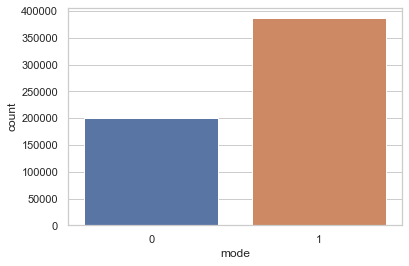

In [19]:
sns.countplot(x='mode', data=df)
plt.show()

In [20]:
df_keys.groupby('mode').mean()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
mode,,,,,,,,,,,,,,
0,28.429142,234905.358288,0.058849,0.573915,0.564876,-9.919915,0.109361,0.421304,0.117162,0.212140,0.548184,118.139327,3.883831,1991.145698
1,27.125116,227537.097796,0.036440,0.558248,0.530207,-10.354270,0.102534,0.464654,0.111529,0.214865,0.554420,118.633454,3.867971,1987.230185


### 7) Tempo vs. Danceability

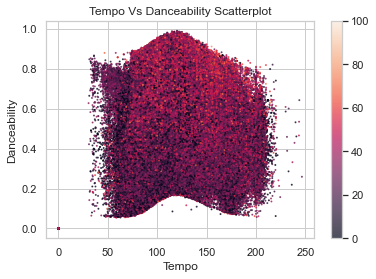

In [21]:
plt.title('Tempo Vs Danceability Scatterplot')
plt.scatter(df['tempo'], df['danceability'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.colorbar()
plt.show()

### 8) Acousticness vs. Energy vs. Loudness
energy와 loudness는 비례, acousticness와 (energy, loudness)는 반비례!

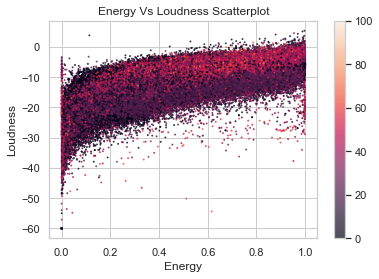

In [22]:
plt.title('Energy Vs Loudness Scatterplot')
plt.scatter(df['energy'], df['loudness'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.colorbar()
plt.show()

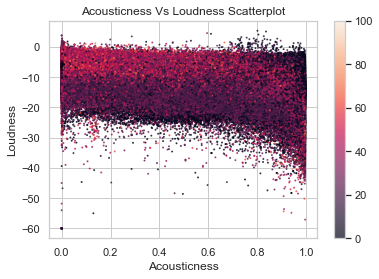

In [23]:
plt.title('Acousticness Vs Loudness Scatterplot')
plt.scatter(df['acousticness'], df['loudness'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.colorbar()
plt.show()

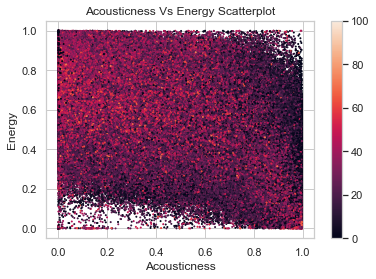

In [24]:
plt.title('Acousticness Vs Energy Scatterplot')
plt.scatter(df['acousticness'], df['energy'], c=df['popularity'], s=1)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.colorbar()
plt.show()

## EDA 정리
대부분의 자료를 연도 기준으로 데이터를 분류했다.

* popularity는 연도가 지날수록 증가한다.

* duration은 연도가 지날수록 감소할 것이다라고 생각했으나, 연도가 지날수록 duration이 증가했음을 볼 수 있다. 하지만, 최근에 음악 시간이 급격히 감소한 것을 볼 수 있다.

* 연도가 지날수록 발표되는 음악의 개수가 증가한다.

* 연도가 지날수록 Accousticness가 감소한다.
* 연차에 따른 Danceability와 valence의 추이가 얼추 비슷하다.

* 대부분의 데이터는 explit하지 않다.

* Key Column에 대해서는
	C 코드와 G코드가 가장 많으며 그 다음으로는 D와 A가 많다.
	Key에 따라 어느 정도의 Popularity 차이가 있을 것이라고 생각했는데, 평균이 비슷함을 알 수 있다.

* Mode에는 Minor(=0), Major(=1)의 값을 가지며 Major인 노래가 더 많다.
	Major인 노래가 Popularity가 더 높을 것이라고 생각했는데 비슷함을 알 수 있다.

* Tempo와 Danceability는 비례 관계일 것이라고 생각했으나, Tempo가 120 이하 일 때 Danceability와 비례하지만, 템포가 너무 빨라지면 오히려 Danceability와 반비례한다.
* Tempo가 100-150사이이며 Danceability가 0.6 이상인 값들이 Popularity가 높음을 알 수 있다.

* Energy가 Loudness가 비례하고, 둘 다의 값이 클수록 popularity가 높다.
* Acousticness가 낮고 음악이 시끄러우면 Popularity가 높다. Acousticness가 높으면 Loudness가 작은 값에 많은 데이터들이 있다.
* Acousticness와 Energy도 Loudness와 비슷한 추이를 보일 것이라고 가정했으나, 골고루 펼쳐 있음을 알 수 있다.